In [1]:
# api homework

In [2]:
import pandas as pd
import datetime
import citipy as cp
import numpy as np
import random
import requests
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import csv
from config import api_key

In [3]:
# get at least 500 unique city names using random coords from citypy

In [4]:
from citipy import citipy
cities = []

counter = 0
while counter < 1000:  # tested and works for 1000
    city_loc = citipy.nearest_city(random.randrange(-180,180,1),random.randrange(-90,90,1))
    city_n = city_loc.city_name
    if city_n not in cities:
        cities.append(city_n) # insert teh return value into cities list
        counter+=1

# print(cities)  # to check output
cities_df=pd.DataFrame(cities)
# cities_df.head()
cities_df.to_csv('0_city_list.csv') # saves list of cities to try 

In [5]:
# pass the city names to open weather to get data

In [6]:
units="imperial"
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = url + 'appid=' + api_key + "&units=" + units + "&q=" #+ city
# query_url

In [7]:
# lots o' lists
name=[]
idnum=[]
lat=[]
temp=[]
hum=[]
cloud=[]
wind=[]


In [8]:
for city in cities:
    response=requests.get(query_url+city).json()
    try:
        name.append(response['name'])
        idnum.append(response['id'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print("url: " + query_url + city + " city: " + city + " city id: " + str(response['id']))
        
    except KeyError:
        
        print("no weather data for city: " + city )


url: http://api.openweathermap.org/data/2.5/weather?appid=2e74a7f73954be98bfdabaa924f65cd2&units=imperial&q=ushuaia city: ushuaia city id: 3833367
no weather data for city: barentsburg
url: http://api.openweathermap.org/data/2.5/weather?appid=2e74a7f73954be98bfdabaa924f65cd2&units=imperial&q=nizwa city: nizwa city id: 286987
url: http://api.openweathermap.org/data/2.5/weather?appid=2e74a7f73954be98bfdabaa924f65cd2&units=imperial&q=itupiranga city: itupiranga city id: 3397851
url: http://api.openweathermap.org/data/2.5/weather?appid=2e74a7f73954be98bfdabaa924f65cd2&units=imperial&q=guarapari city: guarapari city id: 3461888
url: http://api.openweathermap.org/data/2.5/weather?appid=2e74a7f73954be98bfdabaa924f65cd2&units=imperial&q=upernavik city: upernavik city id: 3418910
url: http://api.openweathermap.org/data/2.5/weather?appid=2e74a7f73954be98bfdabaa924f65cd2&units=imperial&q=port alfred city: port alfred city id: 964432
url: http://api.openweathermap.org/data/2.5/weather?appid=2e74a7

In [9]:
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

data_retrieved=pd.DataFrame({'city_name':name,'city_id':idnum,'latitude':lat,'longitude':temp,'humidity':hum,'cloud_cover':cloud,'wind_speed':wind})
data_retrieved.to_csv("0_data_from_open_weather.csv")

In [10]:
# make scatters of these
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

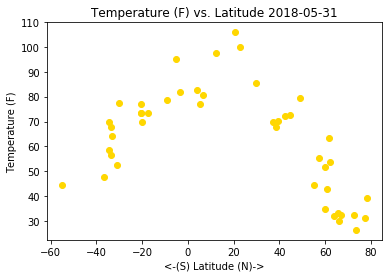

In [11]:
plt.scatter(lat,temp, c='gold')
plt.title("Temperature (F) vs. Latitude " + str(datetime.date.today()))
plt.ylabel("Temperature (F)")
plt.xlabel("<-(S) Latitude (N)->")
plt.savefig('0_TempVLat.png')

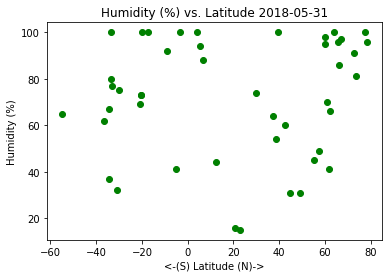

In [12]:
plt.scatter(lat,hum, c='green')
plt.title("Humidity (%) vs. Latitude " + str(datetime.date.today()))
plt.ylabel("Humidity (%)")
plt.xlabel("<-(S) Latitude (N)->")
plt.savefig('0_HumVLat.png')

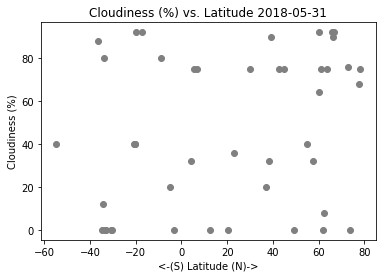

In [13]:
plt.scatter(lat,cloud, c='grey')
plt.title("Cloudiness (%) vs. Latitude " + str(datetime.date.today()))
plt.ylabel("Cloudiness (%)")
plt.xlabel("<-(S) Latitude (N)->")
plt.savefig('0_CloudVLat.png')

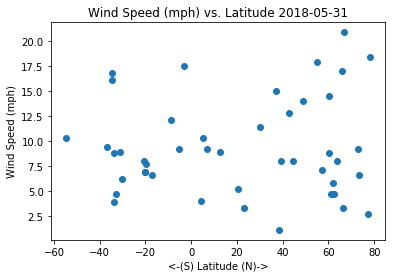

In [14]:
plt.scatter(lat,wind)
plt.title("Wind Speed (mph) vs. Latitude " + str(datetime.date.today()))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("<-(S) Latitude (N)->")
plt.savefig('0_WindVLat.png')

In [15]:
# Save both a CSV of all data retrieved and png images for each scatter plot.

In [16]:
import datetime
today = datetime.date.today()
print(today)

2018-05-31
